In [1]:
# show the matplotlib plotted graph within notebook lines.
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Encoding for target labels
0=alt.atheism
1=comp.graphics
2=comp.os.ms-windows.misc   
3=comp.sys.ibm.pc.hardware
4=comp.sys.mac.hardware
5=comp.windows.x
6=misc.forsale
7=rec.autos
8=rec.motorcycles    
9=rec.sport.baseball
10=rec.sport.hockey
11=sci.crypt
12=sci.electronics
13=sci.med
14=sci.space
15=soc.religion.christian
16=talk.politics.guns
17=talk.politics.mideast
18=talk.politics.misc
19=talk.religion.misc

In [2]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import pandas 
import numpy as np2
import scipy
import scipy.stats as st
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import stats

In [3]:
# extract data
!tar -xf /resources/data/20news-19997.tar.gz -C data

tar: /resources/data/20news-19997.tar.gz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [4]:
# display newsgroups directories
!ls /resources/data/20_newsgroups

alt.atheism		  rec.autos	      sci.space
comp.graphics		  rec.motorcycles     soc.religion.christian
comp.os.ms-windows.misc   rec.sport.baseball  talk.politics.guns
comp.sys.ibm.pc.hardware  rec.sport.hockey    talk.politics.mideast
comp.sys.mac.hardware	  sci.crypt	      talk.politics.misc
comp.windows.x		  sci.electronics     talk.religion.misc
misc.forsale		  sci.med


In [5]:
import os
# create file directory for all files
files = []
folders = []
folderslist = []
counter312 = 0
for (path, dirnames, filenames) in os.walk('/resources/data/20_newsgroups'):
    folders.extend(os.path.join(path, name) for name in dirnames)
    files.extend(os.path.join(path, name) for name in filenames)
    folderslist.extend(os.path.join(path) for name in filenames)
    


In [6]:
# putting file directories into pandas dataframw
files12 = [files]
directorydf= pandas.DataFrame({'Directories': files, 'labels10': folderslist})
#directorydf.columns = ['Directories', 'labels10']

directorydf


,Directories,labels10
0,/resources/data/20_newsgroups/sci.med/59488,/resources/data/20_newsgroups/sci.med
1,/resources/data/20_newsgroups/sci.med/59072,/resources/data/20_newsgroups/sci.med
2,/resources/data/20_newsgroups/sci.med/58109,/resources/data/20_newsgroups/sci.med
3,/resources/data/20_newsgroups/sci.med/59588,/resources/data/20_newsgroups/sci.med
4,/resources/data/20_newsgroups/sci.med/59325,/resources/data/20_newsgroups/sci.med
5,/resources/data/20_newsgroups/sci.med/58819,/resources/data/20_newsgroups/sci.med
6,/resources/data/20_newsgroups/sci.med/59525,/resources/data/20_newsgroups/sci.med
7,/resources/data/20_newsgroups/sci.med/59118,/resources/data/20_newsgroups/sci.med
8,/resources/data/20_newsgroups/sci.med/59424,/resources/data/20_newsgroups/sci.med
9,/resources/data/20_newsgroups/sci.med/58084,/resources/data/20_newsgroups/sci.med


In [7]:
from collections import Counter
import re
import codecs
counter = Counter()
# Open the files and count the word frequency in each file in a loop and update the counter after finished processing a file
for rownum, row in enumerate(directorydf.itertuples()):
    with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
        counter.update([word for word in re.findall(r'\w+', myfile.read())])
    if (rownum % 1000 == 0):
        print("processed %d files" % (rownum+1))

processed 1 files
processed 1001 files
processed 2001 files
processed 3001 files
processed 4001 files
processed 5001 files
processed 6001 files
processed 7001 files
processed 8001 files
processed 9001 files
processed 10001 files
processed 11001 files
processed 12001 files
processed 13001 files
processed 14001 files
processed 15001 files
processed 16001 files
processed 17001 files
processed 18001 files
processed 19001 files


In [8]:
# opening up a sample file and display string
with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
    data=myfile.readlines()


In [9]:
# find top k words occured most requent in the document
k = 1000
topk = counter.most_common(k)

In [10]:
# create function to help encoding the targets
def label_target (d):
    if d.find("alt.atheism") > 0 :
      return 0
    if d.find("comp.graphics") > 0:
      return 1
    if d.find("comp.os.ms-windows.misc") > 0:
      return 2
    if d.find("comp.sys.ibm.pc.hardware") > 0:
      return 3
    if d.find("comp.sys.mac.hardware") > 0:
      return 4
    if d.find("comp.windows.x") > 0:
      return 5
    if d.find("misc.forsale") > 0:
      return 6
    if d.find("rec.autos") > 0:
      return 7
    if d.find("rec.motorcycles") > 0:
      return 8
    if d.find("rec.sport.baseball") > 0:
      return 9
    if d.find("rec.sport.hockey") > 0:
      return 10
    if d.find("sci.crypt") > 0:
      return 11
    if d.find("sci.electronics") > 0:
      return 12
    if d.find("sci.med") > 0:
      return 13
    if d.find("sci.space") > 0:
      return 14
    if d.find("soc.religion.christian") > 0:
      return 15
    if d.find("talk.politics.guns") > 0:
      return 16
    if d.find("talk.politics.mideast") > 0:
      return 17
    if d.find("talk.politics.misc") > 0:
      return 18
    if d.find("talk.religion.misc") > 0:
      return 19
    return 'Other'

In [11]:
np = []
# now we had top k words, count the frequecy (binary) of these words in individual file
for rownum, row in enumerate(directorydf.itertuples()):
    with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
        tempCounter = Counter([word for word in re.findall(r'\w+', myfile.read())])
        # if the word appears in the doc, then 1, else 
        topkinDoc = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        # create a list for top k words with encoded target and its label
        np.append(topkinDoc+[label_target(row.Directories)]+[row.labels10])
        if (rownum % 1000 == 0):
            print("processed %d files" % (rownum+1))
            


processed 1 files
processed 1001 files
processed 2001 files
processed 3001 files
processed 4001 files
processed 5001 files
processed 6001 files
processed 7001 files
processed 8001 files
processed 9001 files
processed 10001 files
processed 11001 files
processed 12001 files
processed 13001 files
processed 14001 files
processed 15001 files
processed 16001 files
processed 17001 files
processed 18001 files
processed 19001 files


In [12]:
newsgroupdf = pandas.DataFrame(np)
dfName = []
for c in topk:
    dfName.append(c[0])
    
newsgroupdf.columns = dfName+['target','label']

In [13]:
newsgroupdf

,the,edu,to,of,a,and,I,is,in,that,...,ap,monitor,1992,needs,among,astro,players,effect,target,label
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med
1,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med
3,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med
4,1,1,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med
5,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med
6,1,1,0,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,1,13,/resources/data/20_newsgroups/sci.med
7,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,13,/resources/data/20_newsgroups/sci.med
8,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med
9,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med


In [16]:
clf = LogisticRegression(C=1)


# QUESTION 1

In [17]:
features_df = newsgroupdf[dfName]
features = features_df.as_matrix()

targets_df = newsgroupdf['target']
targets = targets_df.as_matrix()

scorestrain = []
scorestest = []

for a in range(10):    
        
    features_train1, features_test1, target_train1, target_test1 = train_test_split(features, targets, test_size=0.3)
    
    # train the features and target datasets and fit to a model
    clfModel = clf.fit(features_train1, target_train1)
    # predict target with feature test set using trained model
    target_pred2 = clfModel.predict(features_test1)
    target_predtrain2 = clfModel.predict(features_train1)  
    
    scorestrain.append(metrics.accuracy_score(target_test1, target_pred2))
    scorestest.append(metrics.accuracy_score(target_train1, target_predtrain2))
                      
pandas.DataFrame(metrics.confusion_matrix(target_test1, target_pred2), columns=folders, index=folders)    


,/resources/data/20_newsgroups/sci.med,/resources/data/20_newsgroups/comp.sys.ibm.pc.hardware,/resources/data/20_newsgroups/rec.sport.hockey,/resources/data/20_newsgroups/alt.atheism,/resources/data/20_newsgroups/sci.electronics,/resources/data/20_newsgroups/soc.religion.christian,/resources/data/20_newsgroups/comp.os.ms-windows.misc,/resources/data/20_newsgroups/comp.windows.x,/resources/data/20_newsgroups/sci.crypt,/resources/data/20_newsgroups/talk.religion.misc,/resources/data/20_newsgroups/rec.sport.baseball,/resources/data/20_newsgroups/talk.politics.guns,/resources/data/20_newsgroups/rec.autos,/resources/data/20_newsgroups/comp.sys.mac.hardware,/resources/data/20_newsgroups/misc.forsale,/resources/data/20_newsgroups/talk.politics.mideast,/resources/data/20_newsgroups/rec.motorcycles,/resources/data/20_newsgroups/comp.graphics,/resources/data/20_newsgroups/talk.politics.misc,/resources/data/20_newsgroups/sci.space
/resources/data/20_newsgroups/sci.med,235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61
/resources/data/20_newsgroups/comp.sys.ibm.pc.hardware,0,293,1,3,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
/resources/data/20_newsgroups/rec.sport.hockey,0,2,293,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
/resources/data/20_newsgroups/alt.atheism,0,0,4,310,2,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0
/resources/data/20_newsgroups/sci.electronics,0,0,1,1,297,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
/resources/data/20_newsgroups/soc.religion.christian,0,2,1,0,0,312,1,0,0,0,0,0,0,0,0,0,0,0,0,0
/resources/data/20_newsgroups/comp.os.ms-windows.misc,0,0,0,2,1,0,296,3,0,0,0,0,3,0,0,0,0,0,0,0
/resources/data/20_newsgroups/comp.windows.x,0,0,0,0,0,0,2,281,0,0,0,0,1,0,0,0,0,0,0,0
/resources/data/20_newsgroups/sci.crypt,0,0,0,0,0,0,0,1,277,0,0,0,0,0,0,0,0,0,0,0
/resources/data/20_newsgroups/talk.religion.misc,0,0,0,0,0,0,0,0,0,324,1,0,0,0,0,0,0,0,0,0


In [ ]:
CI2 = st.t.interval(0.95, len(scorestrain)-1, loc=np2.mean(scorestrain), scale=st.sem(scorestrain))
CI2

In [ ]:
scorestrain

In [ ]:
scorestest

# QUESTION 2

1
2
3
4
5
6
7
8
9
10


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


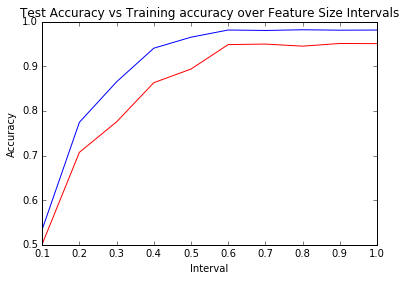

In [19]:
counter1 = 1
featsubset = []
testscore = []
trainscore = []
while(counter1 <= 10):
    print(counter1)   
    featindex = int(counter1*.1 * len(dfName))
    featsubset = dfName[0:featindex - 1]
    
    features_df1 = newsgroupdf[featsubset]
    features1 = features_df1.as_matrix()
    
    features_train, features_test, target_train, target_test = train_test_split(features1, targets, test_size=0.3)
    
    # train the features and target datasets and fit to a model
    clfModel = clf.fit(features_train, target_train)
    # predict target with feature test set using trained model
    target_pred1 = clfModel.predict(features_test)
    target_predtrain1 = clfModel.predict(features_train)
    
    testscore.append(metrics.accuracy_score(target_test, target_pred1))
    trainscore.append(metrics.accuracy_score(target_train, target_predtrain1))
    counter1 += 1
                   
    

xaxis = [".1", ".2", ".3", ".4", ".5", ".6", ".7", ".8", ".9", "1"]

plt.plot(xaxis, trainscore, 'blue')
plt.plot(xaxis, testscore, 'red')
plt.title("Test Accuracy vs Training accuracy over Feature Size Intervals")
plt.ylabel('Accuracy')
plt.xlabel('Interval')
plt.legend()
plt.show() 

# QUESTION 3

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


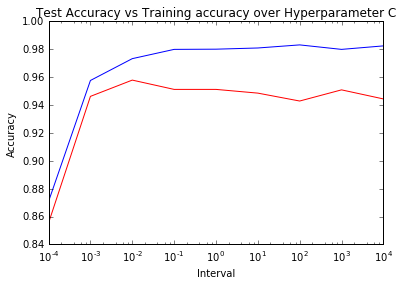

In [17]:
xaxis = [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]
testscore = []
trainscore = []
for num in xaxis:
    
    clf.set_params(C=num)
    
    features_train1, features_test1, target_train1, target_test1 = train_test_split(features, targets, test_size=0.3)
    
    # train the features and target datasets and fit to a model
    clfModel = clf.fit(features_train1, target_train1)
    # predict target with feature test set using trained model
    target_pred2 = clfModel.predict(features_test1)
    target_predtrain2 = clfModel.predict(features_train1)
    
    testscore.append(metrics.accuracy_score(target_test1, target_pred2))
    trainscore.append(metrics.accuracy_score(target_train1, target_predtrain2))
                      
    
plt.plot(xaxis, trainscore, 'blue')
plt.plot(xaxis, testscore, 'red')
plt.title("Test Accuracy vs Training accuracy over Hyperparameter C")
plt.ylabel('Accuracy')
plt.xlabel('Interval')
plt.xscale("log", nonposx='clip')
plt.legend()
plt.show() 

# QUESTION 5

In [39]:

# now we had top k words, count the frequecy (binary) of these words in individual file
with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
    

    tempCounter = Counter([word for word in re.findall(r'\w+', myfile.read())])
    # if the word appears in the doc, then 1, else 
    toplinDoc = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
    topwinDoc = [tempCounter[word] for (word,wordCount) in topk]
    # create a list for top k words with encoded target and its label
    if (rownum % 1000 == 0):
        print("processed %d files" % (rownum+1))
   
    
print("This is binary vector: ", "\n", toplinDoc, "\n")
print("This is TF vector: " ,"\n",topwinDoc, "\n")



This is binary vector:  
 [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [31]:

# now we had top k words, count the frequecy (binary) of these words in individual file
for rownum, row in enumerate(directorydf.itertuples()):
    with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
        tempCounter = Counter([word for word in re.findall(r'\w+', myfile.read())])
        # if the word appears in the doc, then 1, else    
        toppinDoc = [tempCounter[word] for (word,wordCount) in topl]
        np1.append(toppinDoc+[label_target(row.Directories)]+[row.Directories])
        if (rownum % 1000 == 0):
            print("processed %d files" % (rownum+1))

processed 1 files
processed 1001 files
processed 2001 files
processed 3001 files
processed 4001 files
processed 5001 files
processed 6001 files
processed 7001 files
processed 8001 files
processed 9001 files
processed 10001 files
processed 11001 files
processed 12001 files
processed 13001 files
processed 14001 files
processed 15001 files
processed 16001 files
processed 17001 files
processed 18001 files
processed 19001 files


In [34]:
newsgroupdf2 = pandas.DataFrame(np1)
dfName3 = []
for c in topl:
    dfName3.append(c[0])
    
newsgroupdf2.columns = dfName3+['target','label']
newsgroupdf2

,the,edu,to,of,a,and,I,is,in,that,...,monitor,months,1992,needs,among,players,astro,effect,target,label
0,43,12,50,45,40,49,49,26,24,30,...,0,3,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med/59488
1,16,10,13,10,5,4,0,4,4,2,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med/59072
2,53,6,28,17,17,23,76,15,17,22,...,0,2,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med/58109
3,0,5,1,2,1,1,2,1,1,0,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med/59588
4,3,3,1,1,2,0,1,1,2,0,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med/59325
5,3,8,3,4,5,2,0,3,0,3,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med/58819
6,4,11,0,7,2,0,3,0,1,2,...,0,0,0,0,0,0,0,1,13,/resources/data/20_newsgroups/sci.med/59525
7,14,11,6,5,5,5,6,5,4,3,...,0,0,0,0,0,0,0,1,13,/resources/data/20_newsgroups/sci.med/59118
8,5,3,2,3,5,2,0,5,4,2,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med/59424
9,18,8,4,6,2,2,1,5,1,5,...,0,0,0,0,0,0,0,0,13,/resources/data/20_newsgroups/sci.med/58084


In [35]:
features_df3 = newsgroupdf2[dfName3]
features3 = features_df3.as_matrix()

targets_df = newsgroupdf['target']
targets = targets_df.as_matrix()

# initialize
scorestrain = []
scorestest = []

clf.set_params(C=1)
for a in range(10):
    
    features_train1, features_test1, target_train1, target_test1 = train_test_split(features3, targets, test_size=0.3)
    # train then immediately predict the test set
    clfModel = clf.fit(features_train1, target_train1)
    # predict target with feature test set using trained model
    target_pred2 = clfModel.predict(features_test1)
    target_predtrain2 = clfModel.predict(features_train1)
    
    scorestest.append(metrics.accuracy_score(target_test1, target_pred2))
    scorestrain.append(metrics.accuracy_score(target_train1, target_predtrain2))



In [36]:
CI = st.t.interval(0.95, len(scorestest)-1, loc=np2.mean(scorestest), scale=st.sem(scorestest))
CI

(0.93378786007356607, 0.93721213992643393)

 # QUESTION 6

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
icounter = 0
scorestest1 = []
scorestrain1 = []
while(icounter < 5):
    features_train2, features_test2, target_train2, target_test2 = train_test_split(features, targets, test_size=0.3)
    gnbModel = gnb.fit(features_train2, target_train2)
    target_predNB = gnbModel.predict(features_test2)
    scorestest1.append(metrics.accuracy_score(targets[test], target_pred))
    scorestrain1.append(metrics.accuracy_score(targets[train], target_predtrain))
    icounter += 1
    

In [21]:
CI3 = st.t.interval(0.95, len(scorestest1)-1, loc=np2.mean(scorestest1), scale=st.sem(scorestest1))
CI3

(0.94398599649912474, 0.94398599649912496)

# QUESTION 4

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


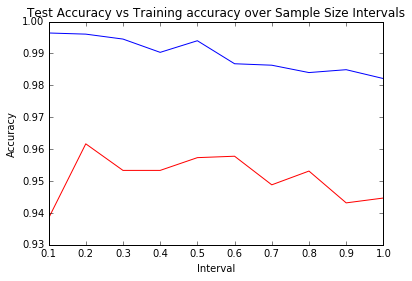

In [19]:
featsubset = []

testscore = []
trainscore = []
xaxis = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
for perc in xaxis:
    
    sampledf = newsgroupdf.sample(frac = perc)
    
    targets_df = sampledf['target']
    targets = targets_df.as_matrix()
    
    features_df = sampledf[dfName]
    features = features_df.as_matrix()
    
    features_train, features_test, target_train, target_test = train_test_split(features, targets, test_size=0.3)
    
    # train the features and target datasets and fit to a model
    clfModel = clf.fit(features_train, target_train)
    # predict target with feature test set using trained model
    target_pred1 = clfModel.predict(features_test)
    target_predtrain1 = clfModel.predict(features_train)
    
    testscore.append(metrics.accuracy_score(target_test, target_pred1))
    trainscore.append(metrics.accuracy_score(target_train, target_predtrain1))                
    



plt.plot(xaxis, trainscore, 'blue')
plt.plot(xaxis, testscore, 'red')
plt.title("Test Accuracy vs Training accuracy over Sample Size Intervals")
plt.ylabel('Accuracy')
plt.xlabel('Interval')
plt.legend()
plt.show() 

In [20]:
targets_df = sampledf['target']
targets = targets_df.as_matrix()
targets

array([ 5, 15,  7, ..., 18, 19, 10])

In [21]:
features_df = sampledf[dfName]
features = features_df.as_matrix()
features

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

# Q1)
a) 1000 words,binary, 19997 files, C value in linear regression
b) [0.94733333333333336,
 0.9468333333333333,
 0.9448333333333333,
 0.94899999999999995,
 0.94766666666666666,
 0.9458333333333333,
 0.94616666666666671,
 0.95150000000000001,
 0.94883333333333331,
 0.94899999999999995]
 
 (0.94630868763398146, 0.94909131236601851)
 
c) Out of 100 tries, 95% of the time the average will be within the CI. It is better to use the CI because you use a wider set of data.

d) [0.98192469814960348,
 0.98163892262627706,
 0.98242480531542475,
 0.98142459098378221,
 0.98092448381796105,
 0.98221047367292991,
 0.98213902979209833,
 0.97985282560548692,
 0.98121025934128747,
 0.9810673715796242]
 
 Training is higher due to the fact you use the training data as means to teach what features match with what label so the accuracy when running a test on it will be higher because the training data is the basis of what features go where.
 
 e) Yes, sci space and sci med
 
 Q2.
 a) top 1000 words and this gives a large enough sample set to get the important words in the email.
 
 b) I would go with document frequency and then the top 5-10% of the documents that have the features.
 
 c) Increasing trend and reaches asymtote at around 600 both.
 
 Q3.
 a) Increasing trend and reaches an asymtote at 10^-3 for both.
 
 Q4.
 a) Declining trend for both.
 
 Q5.
 a) See code under Q5.
 
 b) Binary does slightly better due to the fact that it just checks if a word is in a document, TF however takes into account the word itself and other variances of a word producing less accurate results.
 
Q6.
 a) Naive bayes performs worses possibly due to the case that there is a sample that doesnt fit into any of the classes and if thats the case it counts as a 0.